# Resumen pipelines

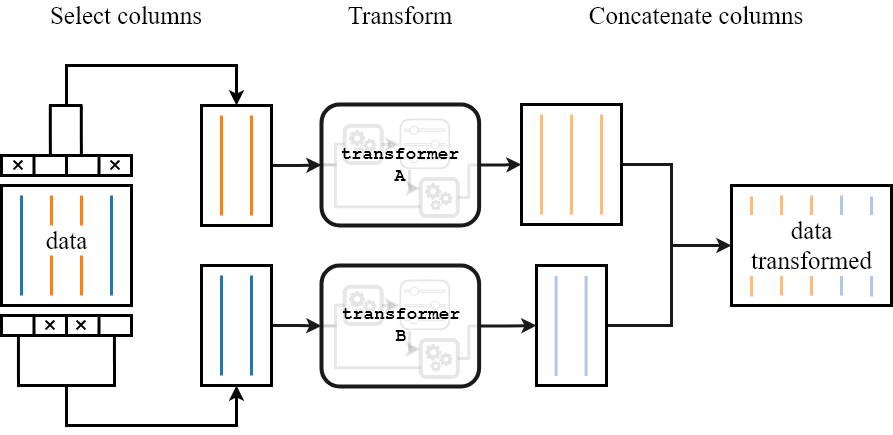

In [ ]:
# Seleccionar característica por tipo

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [ ]:
# Preprocesamiento por tipo de característica

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

In [ ]:
# Crear pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

In [ ]:
# datos para testing y training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ajustar pipeline
pipeline.fit(X_train, y_train)

# score por defecto (accuracy o r2)
pipeline.score(X_test, y_test)

# predicciones
y_pred = pipeline.predict(X_test)

# más métricas 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)